In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_json('../train.json')
descriptions = df['description']
interests = df['interest_level']

In [3]:
bedroom = np.array(df['bedrooms'].as_matrix())
bathroom = np.array(df['bathrooms'].as_matrix())

(array([  9.47500000e+03,   1.57520000e+04,   1.46230000e+04,
          7.27600000e+03,   0.00000000e+00,   1.92900000e+03,
          2.47000000e+02,   4.60000000e+01,   2.00000000e+00,
          2.00000000e+00]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <a list of 10 Patch objects>)

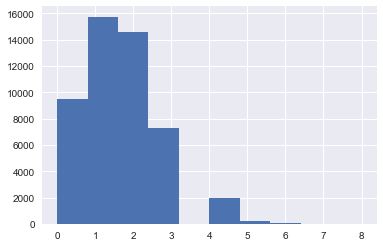

In [4]:
plt.hist(bedroom)

(array([  3.13000000e+02,   4.00670000e+04,   7.93700000e+03,
          8.15000000e+02,   1.88000000e+02,   2.50000000e+01,
          5.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

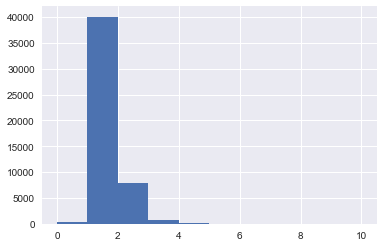

In [5]:
plt.hist(bathroom)

In [6]:
train = pd.read_json('../train.json').set_index('listing_id')
train = train[(train.price<20000) & (train.bedrooms<=5) & (train.bathrooms<=5)]

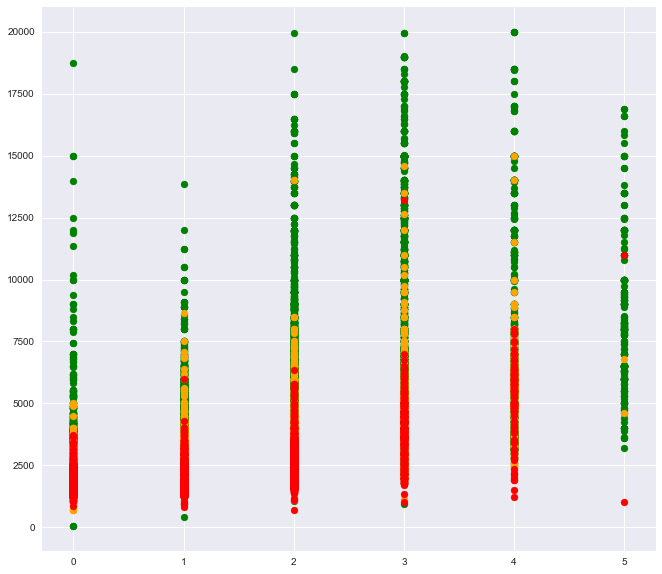

In [7]:
color = {"high": "r", "low":"g", "medium":"orange"}
plt.figure(figsize=(11,10))
for interest in ['low', 'medium', 'high']:
    plt.scatter(train[train.interest_level==interest].bedrooms, 
                train[train.interest_level==interest].price, 
                c=color[interest])

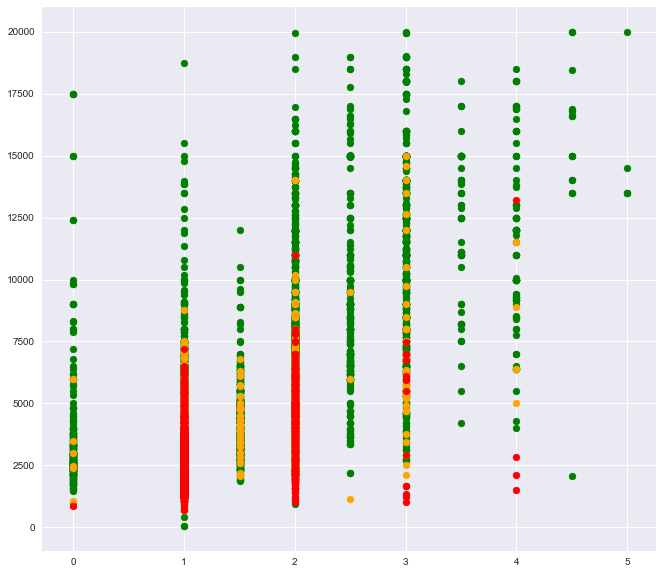

In [8]:
plt.figure(figsize=(11,10))
for interest in ['low', 'medium', 'high']:
    plt.scatter(train[train.interest_level==interest].bathrooms, 
                train[train.interest_level==interest].price, 
                c=color[interest])

In [10]:
import re
replace_reg = re.compile(r'<.+>')
x = []
for t in descriptions:
    t = replace_reg.sub('.', t)
    t = t.replace('w/',' ')
    t = t.replace('spaceIt','space. It')
    t = t.replace('partmentEnjoy','partment. Enjoy')
    t = t.replace('<a',' ')
    t = t.replace('/',' ')
    x.append(t)
print (len(x))

49352


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 0, stop_words = 'english')

In [12]:
tfidf_matrix =  tf.fit_transform(x)
feature_names = tf.get_feature_names()
print (len(feature_names))

31177


In [13]:
dense = tfidf_matrix.todense()
episode = dense[0].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(episode)), episode) if pair[1] > 0]
print (len(phrase_scores))

53


In [14]:
print (sorted(phrase_scores, key=lambda t: t[1] * -1)[:40])

[(14898, 0.22548214665080304), (18777, 0.21821385964652618), (10845, 0.2098876511804497), (14939, 0.20568549384636792), (16278, 0.2024917410130923), (23484, 0.1935011210549156), (15116, 0.1807330485163878), (21804, 0.17486659774959812), (19371, 0.17047344611366874), (9019, 0.16913859124272188), (11735, 0.1687436002943829), (26661, 0.16829832493197758), (4687, 0.16354718986964153), (26262, 0.1621592696873192), (26117, 0.16126770103152252), (17363, 0.16014610930088718), (9737, 0.1557716438518917), (23588, 0.15558855195385807), (25685, 0.14999715058077767), (8942, 0.14951418309013187), (11895, 0.14729069596703714), (29026, 0.14657489790084077), (15476, 0.14643913937091335), (24498, 0.1436529745599563), (6123, 0.13670243228235038), (23595, 0.1363494741453558), (21333, 0.13192711071532723), (13235, 0.12567340823433903), (16301, 0.1236236904657777), (8040, 0.12251113377368075), (23974, 0.11311048224596561), (5724, 0.11210846927578334), (28728, 0.11125770953123157), (8310, 0.1063330257601017)

In [15]:
word2score = dict()
for k in sorted(phrase_scores, key=lambda t: t[1] * -1):
    word2score[feature_names[k[0]]] = k[1]
    print ('feature name: ', feature_names[k[0]], '\t\tscore: ', k[1])

feature name:  following 		score:  0.22548214665080304
feature name:  lg 		score:  0.21821385964652618
feature name:  cook 		score:  0.2098876511804497
feature name:  forest 		score:  0.20568549384636792
feature name:  head 		score:  0.2024917410130923
feature name:  rain 		score:  0.1935011210549156
feature name:  fridge 		score:  0.1807330485163878
feature name:  oven 		score:  0.17486659774959812
feature name:  lot 		score:  0.17047344611366874
feature name:  cable 		score:  0.16913859124272188
feature name:  deep 		score:  0.1687436002943829
feature name:  ss 		score:  0.16829832493197758
feature name:  ac 		score:  0.16354718986964153
feature name:  spa 		score:  0.1621592696873192
feature name:  soaking 		score:  0.16126770103152252
feature name:  internet 		score:  0.16014610930088718
feature name:  chef 		score:  0.1557716438518917
feature name:  ready 		score:  0.15558855195385807
feature name:  shower 		score:  0.14999715058077767
feature name:  cabinet 		score:  0.1495141830

In [16]:
def compute_description_score(t):
    t = t.replace('.', ' ')
    t = t.replace(',', ' ')
    t = t.split(" ")
    sums = 0
    for k in t:
        if k in word2score:
            sums += word2score[k]
    return sums

In [17]:
df["num_photos"] = df["photos"].apply(len)
df["num_features"] = df["features"].apply(len)
df["num_description_words"] = df["description"].apply(lambda x: len(x.split(" ")))
df["created"] = pd.to_datetime(df["created"])
df["created_year"] = df["created"].dt.year
df["created_month"] = df["created"].dt.month
df["created_day"] = df["created"].dt.day
df["bath_bed_sum"] = df['bathrooms'] + df['bedrooms']
df["bath_bed_diff"] = df['bathrooms'] - df['bedrooms']
df["price_per_bed"] = df['price'] / df['bedrooms']
df["price_per_bath"] = df['price'] / df['bathrooms']
df["price_per_room"] = df['price'] / df['bath_bed_sum']
df["tfidf"] = df["description"].apply(lambda x: compute_description_score(x))

In [18]:
features_to_use = ["bathrooms", "bedrooms", "latitude", "longitude", "price",
                   "num_photos", "num_features", "num_description_words",
                   "created_year", "created_month", "created_day", "price_per_bed",
                   "price_per_bath", "price_per_room", "bath_bed_diff", "bath_bed_sum"]
features_to_use.append("tfidf")
X = df.drop(['interest_level'], axis = 1)
# X = df
y = df['interest_level']
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.33)
print(X_tr.reset_index().loc[1,:])

index                                                                34330
bathrooms                                                                1
bedrooms                                                                 2
building_id                               8f837ada8d7ec5d251a369cd5909af7c
created                                                2016-06-20 18:50:16
description              Beautiful  2BR in the UES. Stainless steel app...
display_address                                             Madison Avenue
features                 [Elevator, Laundry in Building, Laundry in Uni...
latitude                                                           40.7957
listing_id                                                         7184933
longitude                                                         -73.9481
manager_id                                aa3a7aae0804061cf9535ead6545ba1c
photos                   [https://photos.renthop.com/2/7184933_ef0ef2c0...
price                    

In [21]:
# from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
features_selected = ["bathrooms", "bedrooms", "latitude", "longitude", "price",
                   "num_photos", "num_features", "num_description_words",
                   "created_year", "created_month", "created_day", "price_per_bed",
                   "price_per_bath", "price_per_room", "bath_bed_diff", "bath_bed_sum"]
clf = XGBClassifier(objective='multi:softmax')
clf.fit(X_tr[features_selected] , y_tr)
log_proba_val = -np.log(clf.predict_proba(X_val[features_selected]))
onehot_val = pd.get_dummies(y_val).as_matrix().astype(np.bool_)
print('baseline', log_proba_val[onehot_val].mean())

baseline 0.647312


In [22]:
features_selected.append('tfidf')
clf = XGBClassifier(objective='multi:softmax')
clf.fit(X_tr[features_selected] , y_tr)
log_proba_val = -np.log(clf.predict_proba(X_val[features_selected]))
onehot_val = pd.get_dummies(y_val).as_matrix().astype(np.bool_)
print('baseline with description', log_proba_val[onehot_val].mean())

baseline with description 0.646518


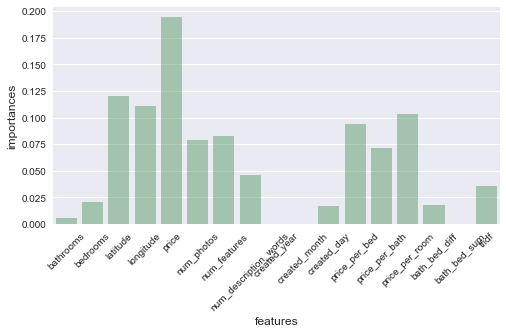

In [23]:
plt.figure(figsize=(8,4))
g = sb.barplot(features_selected, clf.feature_importances_, alpha=.5, color=sb.color_palette()[1])
plt.xticks(rotation=45)
plt.ylabel('importances', fontsize=12)
plt.xlabel('features', fontsize=12)
plt.savefig('xgboost_baseline.png')
plt.show()